# ***SELECTION-SORT VS QUICK-SORT***

### *The following is a comparison of the performace of two famous and simple sorting algoirthms : selection and quick sort*

======================================================================================================================

### *Index:*

The document is organized as follows:
1. Overview of the alorithms with respective expected performance and implementation 
    1. Selection Sort
    2. Quick sort
2. Overview of the experiment
3. Building the data set for test
4. Running the test and collecting result data 
5. Plotting the data and confronting it with the expected results



======================================================================================================================

# 1. Overview of the algorithms

   ##  A)  Selection Sort

### Algorithm overview 

*Selection Sort* is one of the simpliest sorting algorithms. The idea is simple: ***find the smallest element of the unordered list, make it the first element and iterate on the remaining part of the array until the entire list is sorted***. 

The algorithm handles two arrays: one being the altready ordered array and the other the array yet to sort. At every iteration the smallest element of the unsorted array moves to the beginning of it. The sorted array grows by one, including the first and smallest element of the unsorted array untill the unsorded array has size 0.
Note that we the subarrays we are talking about are logical and that the algorithm is ***in place*** and it doesn't require extra memory space.

As the algorithm needs to cycle the all the elements of the unsorted array for each of the N elements of the input, it visits **N$\times$N** elements. Thats to say its complexity follows ***O($N^2$)***.





![](https://miro.medium.com/v2/resize:fit:1400/1*5WXRN62ddiM_Gcf4GDdCZg.gif)
gif by: https://s-satsangi.medium.com/

### Python Code

#### The following snippet implements the algorithm in a python function, that we will use later for testing

In [1]:
def SelectionSort(A):
    for i in range(0, len(A)): #the index i reppresents the size of the sorted subarray
        min_idx = i #set min index to current index
        for j in range(i+1, len(A)):
            if A[j] < A[min_idx]:
                min_idx = j
        A[i], A[min_idx] = A[min_idx], A[i] #swap the smallest element in the unsorted subarray with its first one
    return A

##  B)  Quick Sort

### Algorithm Overview

*Quick Sort* is one of the most efficient **in place** sorting algorithm, with an avarage expected running time of ***O(NlogN)***, usually which makes it the best choice for sorting problems. 
Quick Sort is a *Divide and Conquer* algorithm and given the input A[p_r], with p index fo the first elemt and r of the last one, it operates as follows:   
**DIVIDE:** the method *Partition* splits the array A into to smaller (eventually empty) subarrays. A[p_q-1] and A[q+1_r] such that all elements in A[p_q-1] are smaller than A[q], and all elements in A[q+1_r] are greater than A[q]. Calculating q is the main part of this procedure.     
**CONQUER:** Sort the two subarrays created before by recursive calls the quicksort.    
**COMBINE:** Combining is trivial as the new array as build is already sorted.  




![](https://miro.medium.com/v2/resize:fit:1100/1*FN4OxxaozdCMUmYtgvWRVg.gif)
gif by: https://s-satsangi.medium.com/

### Python Code
The following code implements the algorithm in the two methods Partition (DIVIDE) and QuickSort (CONQUER)


In [2]:
def Partition(A,p,r):
    x = A[r-1]
    i = p-2
    for j in range(p-1, r-1):
        if A[j] <= A[r-1]:
            i += 1
            swap = A[i]
            A[i] = A[j]
            A[j] = swap
    swap = A[i+1]
    A[i + 1] = A[r-1]
    A[r-1] = swap
    return i+2

In [3]:
def QuickSort(A, p, r):
    if p<r:
        q = Partition(A,p,r)
        QuickSort(A, p, q-1)
        QuickSort(A, q+1, r)

In [4]:
def Q(A):
    QuickSort(A, 1, len(A))
    return A

### Expected complexity

The running time (we don't need to measure space as the algorithm runs inplace) of QuickSort depends heavily on whether the partition is balanced or not, considering a *well balanced* partition if the size of A[p_q-1] and A[q+1_r] is similar (or optimally the same) and a *badly balanced* if size of A[p_q-1] >> or << A[q+1_r].
In the **WORST CASE** the algorithm would perform on ***O($N^2$)*** time and would be the same as *Selection Sort*, but in the avarage case, where the partition is balanced the, the time goes down to ***O(NlogN)***, with even smaller constants as *MergeSort*.


======================================================================================================================

# 2. Overview of the experiment


We want to confront the two algorithms on the *time* they take to sort an array, as they both order *in place*.    
To do so, we will take ***random arrays of increasing length*** and feed them to the algorithms. We will them measure the ***time*** they take to sort the differt arrays. We will then plot their sizes against the time the algorithms take to sort them.   
To have more accurate results we can iterate the process on different data sets and take the *mean* of the several results per array size class.    
We will provide a generator for the data set to feed to the test as well as a metheod to retrieve specs of the test bench.



### What do we expect?

Given that we will generate input arrays randomly and with *uniform* distribution, we have no reason to expect the data to be biased on any way.    
We expect for the QuickSort to perform on ***O(NlogN)*** time and SelectionSort on ***O($N^2$)*** time and their difference will be reflected on the ploted data as an increasing gap on the avarage time as the array length increases.

### Importing needed libraries

In [5]:
import copy
import random
import numpy as np
from timeit import default_timer as timer
import matplotlib.pyplot as plt
#rise maximum depth of recursion to 10000 for testing
import sys
sys.setrecursionlimit(10000)

#importing libraries for retrievieng info on the system we're running the code
import platform
import cpuinfo
import psutil

### **TEST BENCH SPECS**

*Use the code snippet underneath to retrieve the system specs of the current machine*


In [6]:
info = cpuinfo.get_cpu_info()
ram = psutil.virtual_memory()

#----CPU info----
print("CPU name:", info["brand_raw"])
print("Number of CPU cores:", info["count"])

#----RAM info----
print("Total RAM:", round(ram.total / (1024 ** 3), 2), "GB")

#----OS info----
print("Operating system core:", platform.system())
print("Operating system release:", platform.release())

CPU name: Apple M1
Number of CPU cores: 8
Total RAM: 8.0 GB
Operating system core: Darwin
Operating system release: 22.2.0


### Data Generator

The following code generates a three dimensional array. The **sampleSize** reppresents the *width of the sample space*. The **maxArraySize** is the *maximum length* of the array to sort and the third dimension is going to be defined as the maximum length floor-divided by the **stepSize** we use to reach it.


### Define the size of the DATA SET

In [17]:
#the bigger the sample size the 'smoother' the plot and the bigger the confidence we have on the results
sampleSize = 1000
#the bigger the array size the more visible the performance gap will be
#anything bigger than 100-125 will make the difference more than visible
maxArraySize = 50
stepSize = 1

![DataSetVisual](https://raw.githubusercontent.com/rengega/ASD_LAB/main/dataSet.png)


In [8]:
def generateTestData(sampleSize, maxArraySize, stepSize):
    A = []
    for i in range (0, sampleSize):
        B = []
        for j in range(stepSize, maxArraySize+1, stepSize): #a[x] = 250
            B.append(np.random.randint(1, 10000, j))
        A.append(B)
    return A

### Generating DataSets

In [9]:
A_QS = generateTestData(sampleSize, maxArraySize, stepSize)
A_SS = copy.deepcopy(A_QS) #taking a copy of the data set as the algorithms both order in place

##### Generating Results

The snippets underneath run the algoirthms on the data set we just generated, and the third one is a call to them.


In [10]:
#generate time data set for quicksort
def generateTimeDataSetQuickSort(A):
    time = []
    for i in range (0, len(A)):
        timeB = []
        for j in range (0, len(A[i])):
            start = timer()

            Q(A[i][j])

            end = timer()
            timeB.append(end - start)
            timeB_copy = timeB.copy()
        time.append(timeB_copy)
    return time

In [11]:
def generateTimeDataSetSelectionSort(A):
    time = []
    for i in range (0, len(A)):
        timeB = []
        for j in range (0, len(A[i])):
            start = timer()

            SelectionSort(A[i][j])

            end = timer()
            timeB.append(end - start)
            timeB_copy = timeB.copy()
        time.append(timeB_copy)
    return time


### Let's actually run the test now

In [12]:
timeQS = generateTimeDataSetQuickSort(A_QS)
timeSS = generateTimeDataSetSelectionSort(A_SS)

We now elaborate the data taking the mean on the sample.

In [13]:
def averageTime(time, maxArraySize, stepSize):
    avgTime = []
    for j in range (0, maxArraySize//stepSize):
        sum = 0
        for i in range (0, len(time)):
            sum += time[i][j]
        avgTime.append(sum/len(time)*1000) #covnerting to milliseconds
    return avgTime

In [14]:
mean_timeQS = averageTime(timeQS, maxArraySize, stepSize)
mean_timeSS = averageTime(timeSS, maxArraySize, stepSize) 

We now define an array conaing the sizes of the different arrays we ordered so that we can plot them againts the time it took to sort them.

In [15]:
lenA = []
for i in range (0, maxArraySize, stepSize):
    lenA.append(i)

And now we Plot the results.

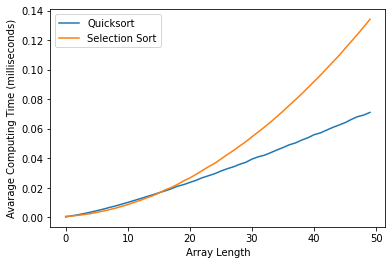

In [16]:
plt.plot(lenA, mean_timeQS)
plt.plot(lenA, mean_timeSS)
plt.xlabel('Array Length')
plt.ylabel('Avarage Computing Time (milliseconds)')
plt.legend(['Quicksort', 'Selection Sort'], loc='upper left')
plt.show()